Цели: 
* Вместе с отделом маркетинга проанализировать список гипотез для увеличения выручки.
* Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

# Часть 1. Приоритизация гипотез. #

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
try:   
    df = pd.read_csv('/datasets/hypothesis.csv')

except:    
    df = pd.read_csv('D:/y_p/13_project/hypothesis.csv')  

In [3]:
display(df)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Выполним приоритизацию гипотез, чтобы правильно распределить ресурсы и понять, что стоит тестировать, а что будет невыгодно с точки зрения затрат/влияния на метрики.

**Применим фреймворк ICE и отсортируйте гипотезы по убыванию приоритета.**

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
df['ICE'] = df['Impact'] * df['Confidence'] / df['Efforts']
display(df.sort_values(by='ICE', ascending=False)[['Hypothesis','ICE']])

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Применим фреймворк RICE и отсортируйте гипотезы по убыванию приоритета.**

In [6]:
df['RICE'] = df['Reach'] * df['Impact'] * df['Confidence'] / df['Efforts']
display(df.sort_values(by='RICE', ascending=False)[['Hypothesis','RICE']])

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Промежуточные выводы по 1 части:**<br>
Порядок гипотез 6 и 4 не изменился. Во фреймворке ICE первые 5 мест занимали гипотезы 8,0,7,6,2, а в RICE - 7,2,0,6,8. Т.е мы видим закономерность - первые 5 мест расположены в разном порядке, но состав одинаковый.<Br>
    
Последние 4 места в ICE - 1,5,3,4, в RICE - 3,1,5,4.<Br>
    
Учитывая результаты обоих фрейворков, я бы советовал тестировать гипотезы в таком порядке (топ 3) - 7,0,2. В основе моего предположения лежит то, что 7 находится на 1 месте в RICE, и на 3 в ICE, т.е 'лучшая', учитывая охват, и в топ 3 без охвата. 0 находится на 2 месте в ICE  и на 3 в RICE. 3 место делится между 2 и 8, но т.к 2-ая гипотеза топ 2 в RICE, будет логичнее выбрать ее. Так же в поддержку своей позиции можно посчитать среднее арифметическое:<Br>
    для 7 - ((1 место + 3 место) /2 = 2);<Br>
    для 0 гипотезы - 2.5;<Br>
    для 2 - 3.5;<Br>
    для 6 - 4;<Br>
    для 8 - 3;<Br>
У 8 гипотезы среднее меньше, чем у 2, но порядок 2 гипотезы учитывает охваты, поэтому я поставил ее раньше 8. Если составлять топ 5, то стоит тестировать гипотезы в таком порядке - 7,0,2,8,6
    <Br>  
* 7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
* 2	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа 
*8	Запустить акцию, дающую скидку на товар в день рождения        
*6	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	  
        
4 гипотеза в обоих фреймворках оказалась на последнем месте - ее стоит рассматривать в последнюю очередь.<Br>
    
Изменения в приоритезации произошли из-за того, что в RICE добавился коэффициент, учитывающий количество пользователей, которых затронет тест.



# Часть 2. Анализ A/B-теста. #

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('D:/y_p/13_project/orders.csv')
    visitors = pd.read_csv('D:/y_p/13_project/visitors.csv')    

In [8]:
display(orders, visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


**Выполним проверку на пропуски, дубликаты и преобразуем тип данных в столбцах с датами**

In [9]:
orders.duplicated().sum()

0

In [10]:
visitors.duplicated().sum()

0

Дубликатов не обнаружено

In [11]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пропусков тоже нет

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
orders['date'] = pd.to_datetime(orders['date'])

**2.1 Строим графики кумулятивной выручки по группам.**

Создадим массив уникальных пар значений дат и групп теста методом

In [17]:
dates_groups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 

In [18]:
ordersAggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max',
      'group' : 'max',
      'transactionId' : 'nunique',
      'visitorId' : 'nunique',
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
display(ordersAggregated)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [19]:
visitorsAggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max',
      'group' : 'max',
      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
display(visitorsAggregated)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


**Проверим, совпадают ли даты в агрегированной таблице, и в "сырых" данных**

In [21]:
cumulativeData.agg({'date':['max','min']})

,date
max,2019-08-31
min,2019-08-01


In [22]:
orders.agg({'date':['max','min']})

,date
max,2019-08-31
min,2019-08-01


In [23]:
visitors.agg({'date':['max','min']})

,date
max,2019-08-31
min,2019-08-01


Даты совпадают, все впорядке

**Строим графики кумулятивной выручки по группам.**

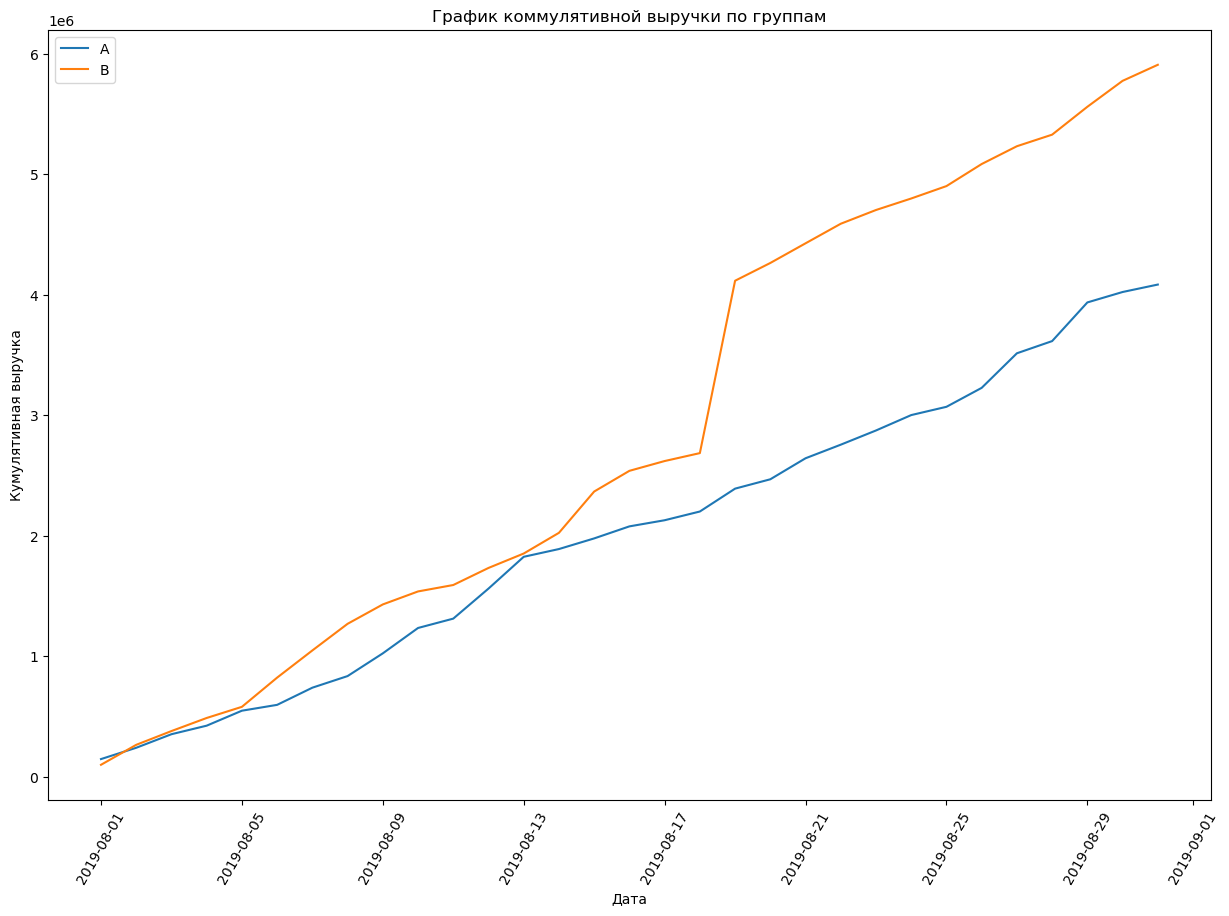

In [32]:
plt.figure(figsize=(15,10))

#делим пользователей на группы
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.title("График коммулятивной выручки по группам")
plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation = 60);

График выручки группы А стабильно растет, а график группы В в точке 2019-08-18 показывает взрывой рост. Это может быть следствием скачка числа заказов или о появлении очень дорогих заказов (выбросы).

**2.2 Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:**

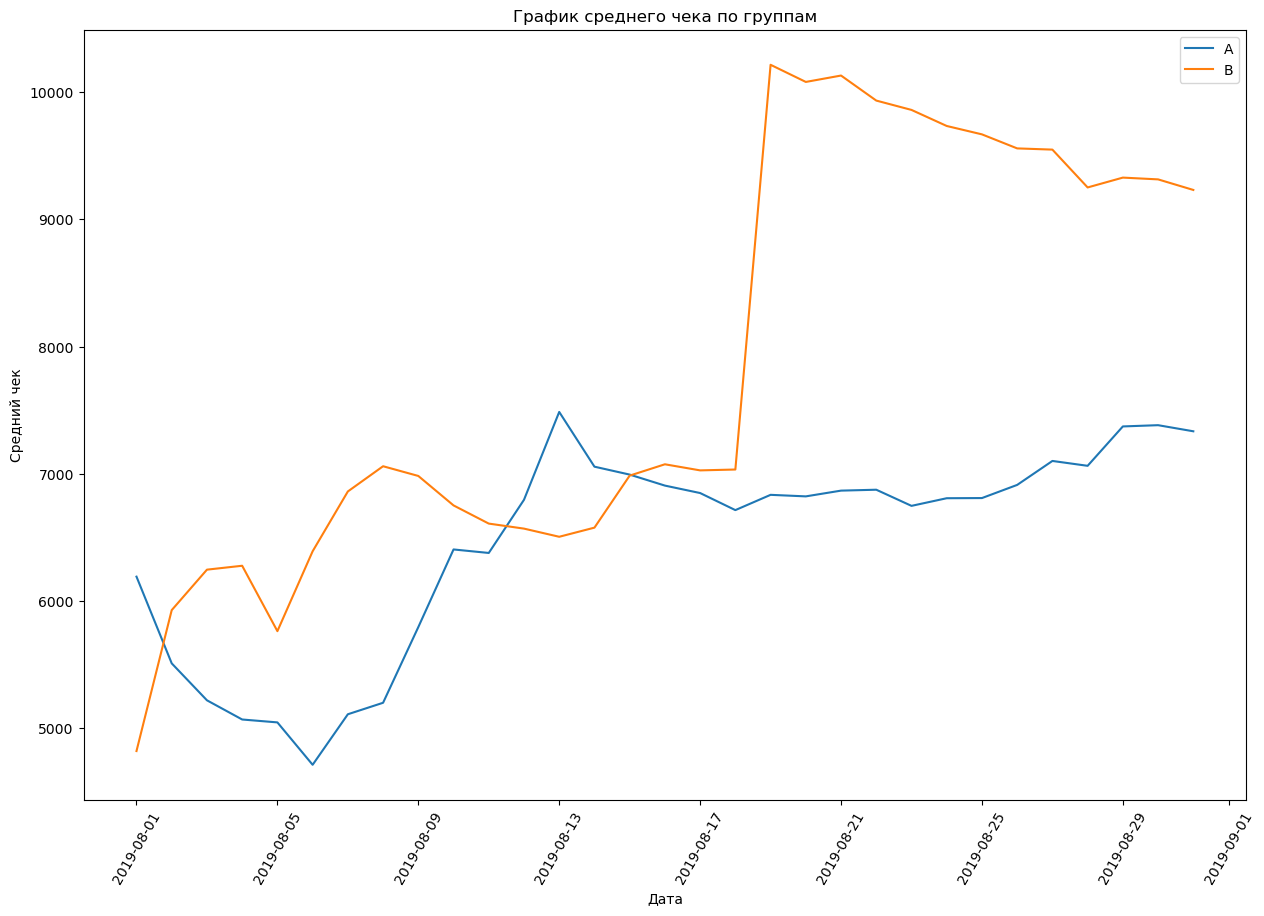

In [34]:
plt.figure(figsize=(15,10))

#для каждой группы считаем средний чек
plt.title("График среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation = 60) 

plt.legend();


К концу теста средний чек группы А становится равномернее, а в начале происходит резкое снижение. У группы Б наблюдается резкий скачок в точке 2019-08-18 а потом снижение. Нужно больше данных по группе Б, чтобы график стал равномернее и приблизился к реальному среднему значению.

**2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

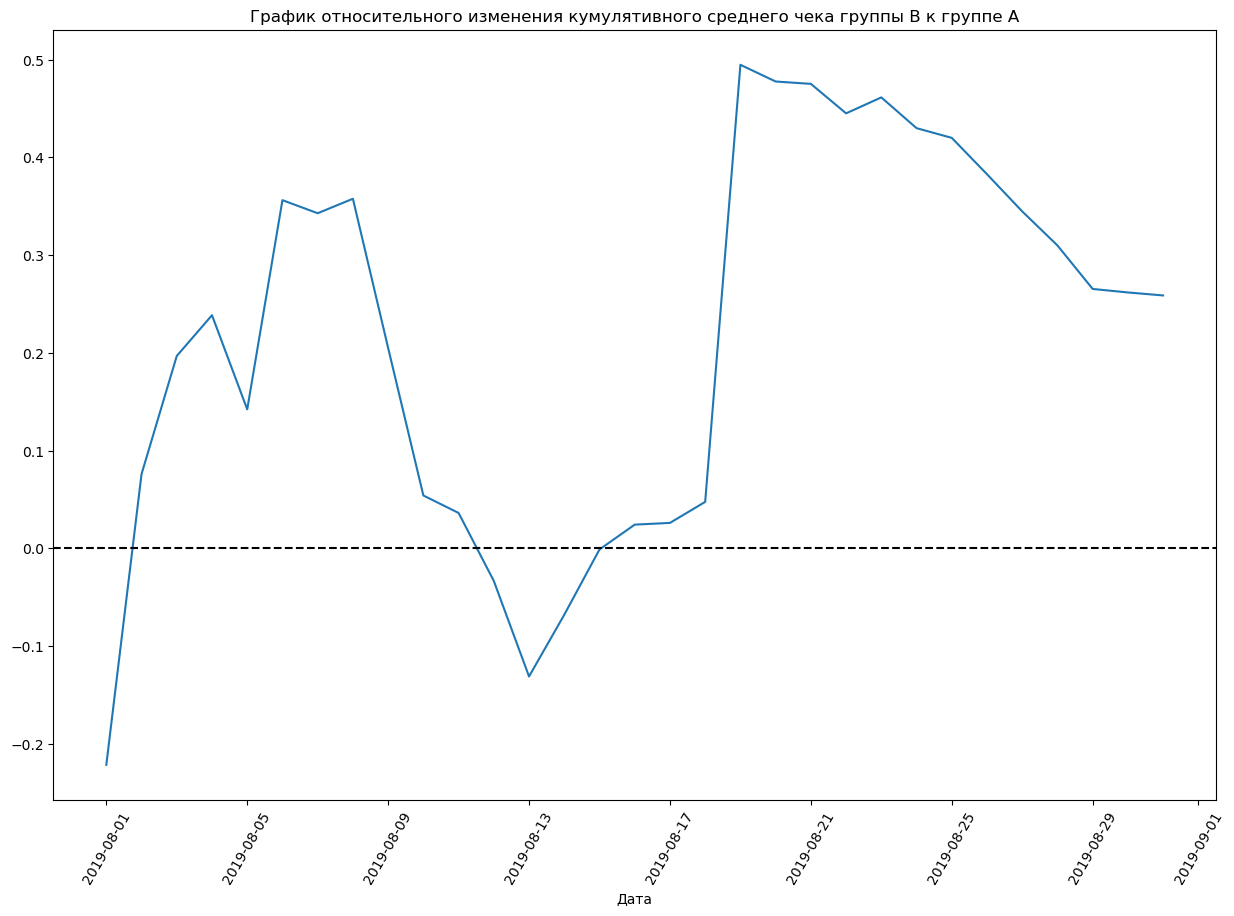

In [39]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,10))
# находим отношение средних чеков
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation = 60) 
plt.axhline(y=0, color='black', linestyle='--');


График несколько раз пересекает 0 - скачет между сигментами - это сигнализирует о наличии выбросов. Однако группа B практически всегда выигрывает группу А

**2.4. Построим график кумулятивного среднего количества заказов на посетителя по группам.**

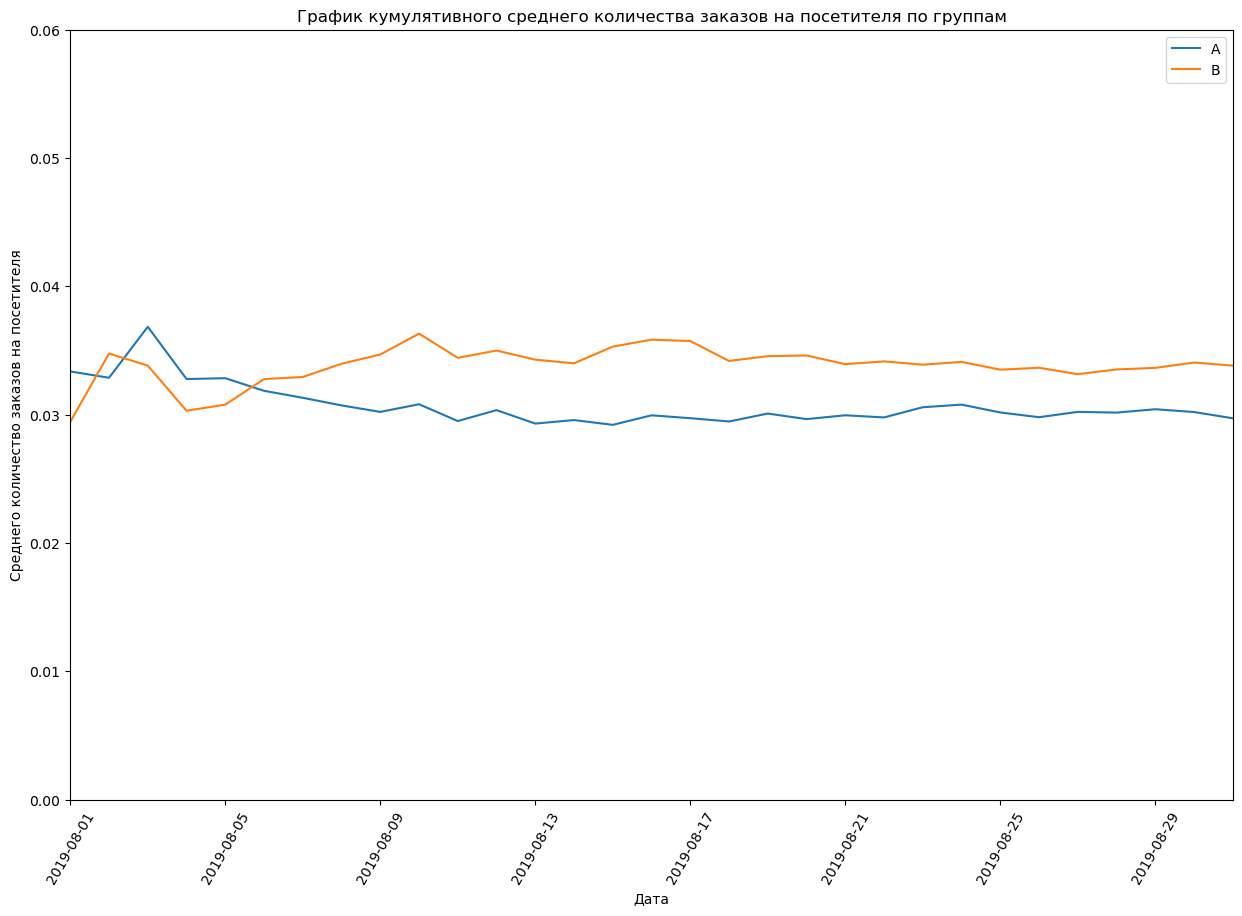

In [45]:
plt.figure(figsize=(15,10))
# добавляем столбец с конверсией (Количество заказов/количество пользователей)
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# вычисляем конверсию для каждой группы

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим график для каждой группы
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.xlabel("Дата")
plt.ylabel("Среднего количество заказов на посетителя")
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation = 60) 

plt.axis([cumulativeDataA['date'].min(), cumulativeDataA['date'].max(),0 , 0.06]);

К концу теста среднее количество заказов на посетителя группы В вырвалась вперед и стабилизировалась, а среднее количество заказов на посетителя группы А снизилась и тоже стабилизорвалась.

**2.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A** 

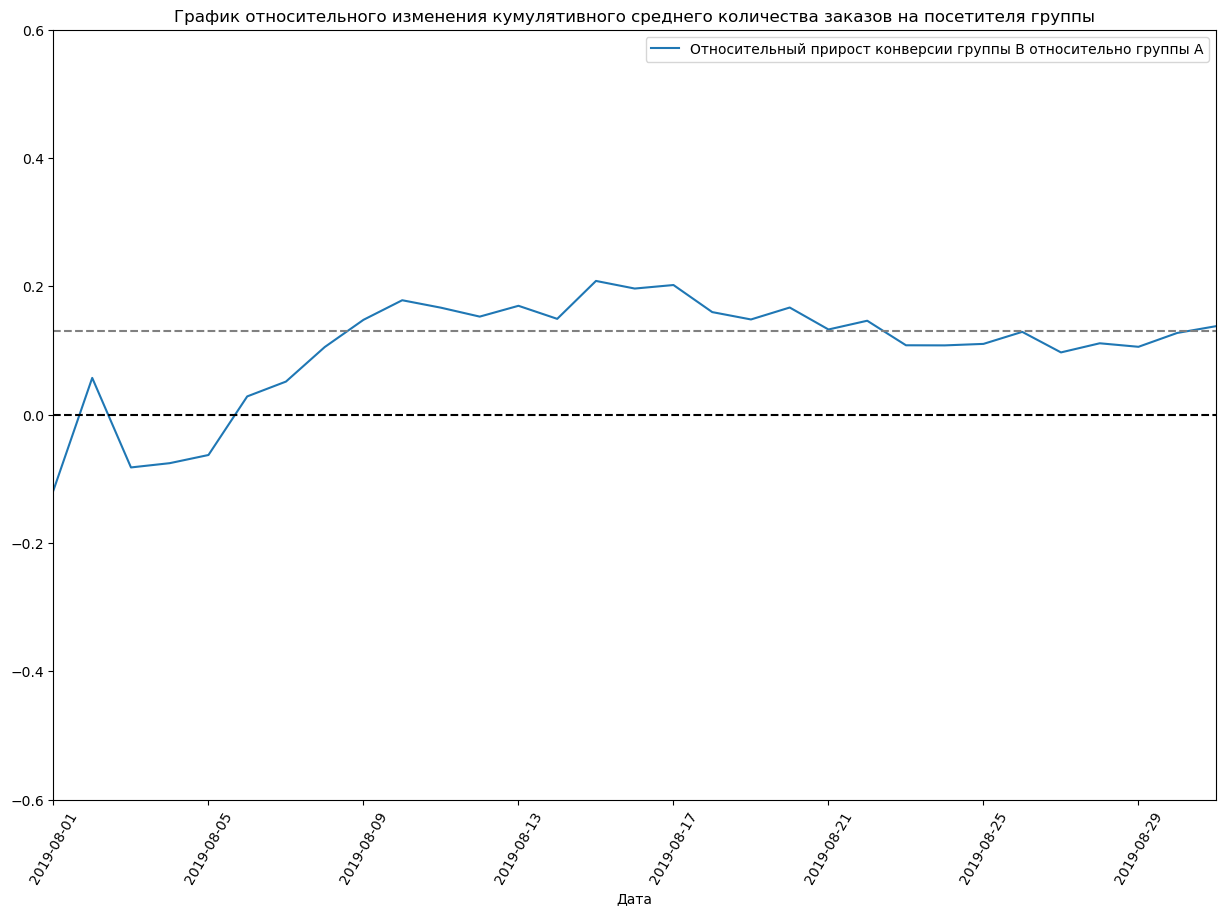

In [58]:
plt.figure(figsize=(15,10))
#Собираем данные в один датафрейм
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#Строим график отноистельного изменеия среднего количества заказов на посетителя группы B к А
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы")
plt.xlabel("Дата")

plt.legend()

plt.xticks(rotation = 60) 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.axis([cumulativeDataA['date'].min(), cumulativeDataA['date'].max(), -0.6, 0.6]);

В начале теста мы видим некоторые колебания, но потом среднее количество заказов на посетителя группы Б вырывается вперед и на протяжении всего теста стабильно лучше конверсии группы А.

In [55]:
#подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


**2.6 Построим точечный график количества заказов по пользователям**

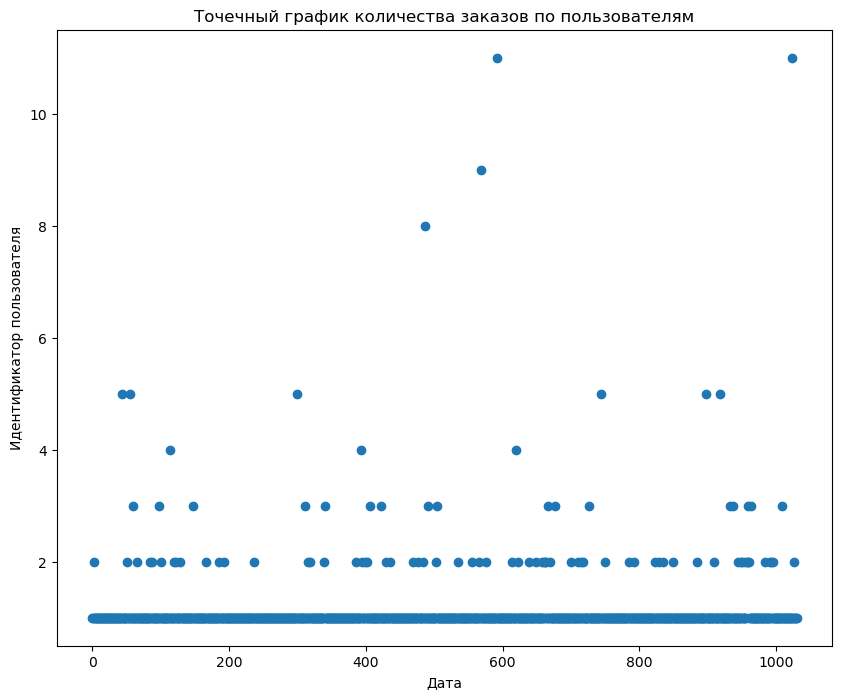

In [71]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,8))
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Дата")
plt.ylabel("Идентификатор пользователя")
plt.scatter(x_values, ordersByUsers['orders']);

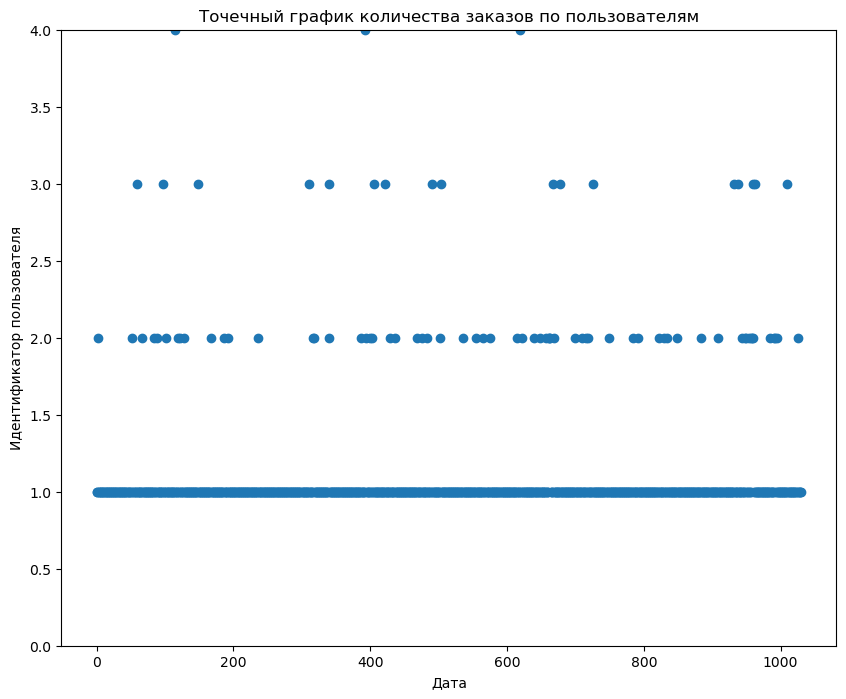

In [73]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,8))
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Дата")
plt.ylabel("Идентификатор пользователя")
plt.ylim(0,4)
plt.scatter(x_values, ordersByUsers['orders']);

По графику видно, что есть небольшое количество аномально больших заказов. Чтобы отсеять крайние значения посчитаем 95-й и 99-й процентили.

**2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.**

In [59]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Делаем вывод, что у 99% пользователей количество заказов равно 4, у 95% - 2. Выбираем верхнюю границу - 2 заказа.

**2.8 Построим точечный график стоимостей заказов.**

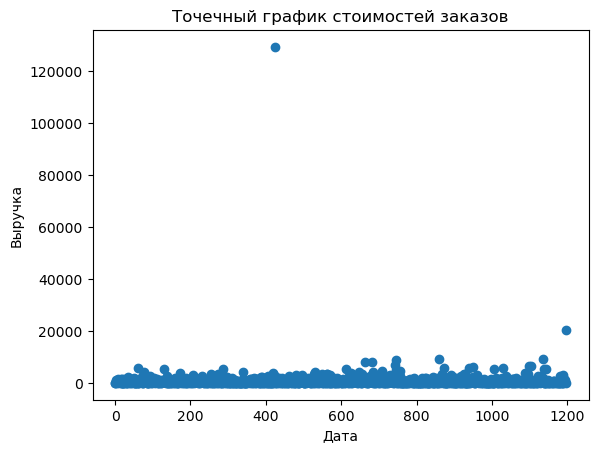

In [74]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.scatter(x_values, orders['revenue']*10**-1);

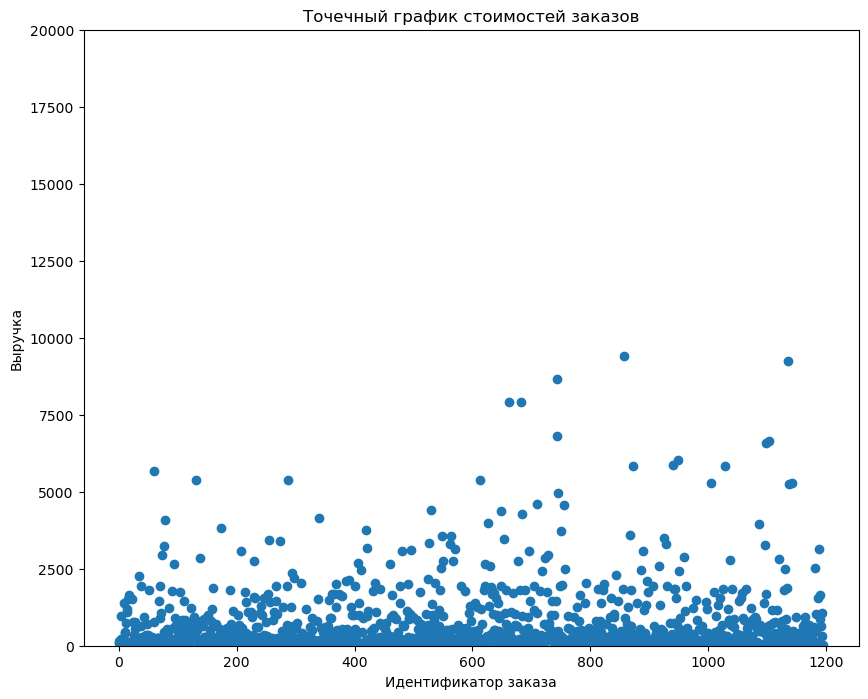

In [79]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,8))
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Идентификатор заказа")
plt.ylabel("Выручка")
plt.ylim(0,20000)

plt.scatter(x_values, orders['revenue']*10**-1);

По графику видно, что существуют заказы с огромной стоимостью, но, в основном, все заказы находятся до 20000.

**2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов.**

In [80]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Лишь 5% процентов заказов имеют стоимость выше 28000, и всего лишь 1% больше 58233. Выбираем верхнюю границу стоимости заказов - 28000.

**2.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Сформулируем нулевую h0 и альтернативную h1 теории.<br>

* Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов на посетителя между группами по 'сырым' данным нет.

* Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов на посетителя  между группами по 'сырым' данным есть

Установим уровень статистической значимости 0.05. Выбираем непараметрический U-критерий Манна-Уитни для независимых выборок, из-за того, что в данных присутствуют выбросы, которые могут сдвинуть результат параметического метода.

In [113]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              20   
1 2019-08-02              20            93822              23   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              16   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  20               101217               719   
1                  43               266748               619   
2                  59               38

**Создаем переменные в которых пользователи, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.** 

In [114]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

**Создадим переменные, в которых пользователям будет соотвествовать количество заказов, если заказов нет, то будет 0.**

In [115]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]), '- p-value')

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1), '- Относительный прирост среднего количества товаром на посетителя группы В к группе А')

0.017 - p-value
0.138 - Относительный прирост среднего количества товаром на посетителя группы В к группе А


1) P-value = 0.017 - это меньше, чем уровень значимости = 0.05. Значит, отвергаем нулевую гипотезу (есть статистически значимые различия), и принимаем альтернативную - различия в среднем между группами есть. <br> 
2) Относительный прирост среднего количества товаров на посетителя группы B к группе А равен 13.8%.

**2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Сформулируем нулевую h0 и альтернативную h1 теории.<br>

* Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами по 'сырым' данным нет.

* Альтернативная гипотеза: Статистически значимые различия в среднем чеке  между группами по 'сырым' данным есть

Установим уровень статистической значимости 0.05. Выбираем непараметрический U-критерий Манна-Уитни для независимых выборок, из-за того, что в данных присутствуют выбросы, которые могут сдвинуть результат параметического метода.

In [116]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]), '- p-value')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)\
      ,'- Относительный прирост среднего количества товаров на посетителя группы B к группе А')

0.729 - p-value
0.259 - Относительный прирост среднего количества товаров на посетителя группы B к группе А


1) P-value = 0.729 - это значительно больше, чем уровень значимости = 0.05. Значит, нет причин отвергать нулевую гипотезу, т.к. между группами нет статистически значимой разницы.<br>
2) Относительный прирост среднего количества товаров на посетителя группы B к группе А равен 25.9%.

**2.12 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

Сформулируем нулевую h0 и альтернативную h1 теории.<br>

* Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов на посетителя между группами по 'очищенным' данным нет.

* Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов на посетителя  между группами по 'оищенным' данным есть

Установим уровень статистической значимости 0.05. Выбираем непараметрический U-критерий Манна-Уитни для независимых выборок, из-за того, что в данных присутствуют выбросы, которые могут сдвинуть результат параметического метода.

In [117]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['transactionId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

858     192721366
18      199603092
23      237748145
37      249864742
1099    316924019
dtype: int64
80


In [118]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name=b'orders',
        ),
    ],
    axis=0,
)

In [119]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]), '- p-value')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1), '- Относительный прирост среднего количества товаров на посетителя группы B к группе А')

0.012 - p-value
0.170 - Относительный прирост среднего количества товаров на посетителя группы B к группе А


1) P-value = 0.012 - это меньше, чем уровень значимости = 0.05. Значит, отвергаем нулевую гипотезу (есть статистически значимые различия), и принимаем альтернативную - различия в среднем между группами есть. <br>
2) Относительный прирост среднего количества товаров на посетителя группы B к группе А равен 17%.

**2.13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

Сформулируем нулевую h0 и альтернативную h1 теории.<br>

* Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами по 'очищенным' данным нет.

* Альтернативная гипотеза: Статистически значимые различия в среднем чеке  между группами по 'очищенным' данным есть

Установим уровень статистической значимости 0.05. Выбираем непараметрический U-критерий Манна-Уитни для независимых выборок, из-за того, что в данных присутствуют выбросы, которые могут сдвинуть результат параметического метода.

In [120]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ), '- p-value'
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ), '- Относительный прирост среднего количества товаров на посетителя группы B к группе А'
)

0.661 - p-value
0.234 - Относительный прирост среднего количества товаров на посетителя группы B к группе А


1) P-value = 0.661 - это значительно больше, чем уровень значимости = 0.05. Значит, нет причин отвергать нулевую теорию, т.к. между группами нет статистически значимой разницы.<br>
2) Относительный прирост среднего количества товаров на посетителя группы B к группе А равен 23.4%.

**Посчитаем процент потерь данных**

In [121]:
ordersByUsers.shape

(1031, 2)

In [122]:
abnormalUsers.shape

(80,)

In [123]:
ordersByUsers.nunique()['userId']

1031

In [124]:
abnormalUsers.shape/(ordersByUsers.nunique()['userId'])*100

array([7.75945684])

Процент потерь после 'очистки' от аномалий - 7.56 %.

**2.14 Резултаты теста**

По результатам теста:<br>
* Наблюдаем статистически значимую разницу в среднем количестве заказов на пользователя между групами как по 'сырым', так и по 'очищенным данным'
* Не наблюдается статистически значимых различий в среднем чеке заказа между группами как по 'сырым', так и по 'очищенным данным'.
* График среднего чека группы B к группе A - сигнализирует о наличии выбросов. Однако группа B практически всегда выигрывает группу А
* График среднего количества заказов на посетителя группы B к группе A - среднее количество заказов на посетителя для группы Б вырывается вперед и на протяжении всего теста стабильно лучше конверсии группы А.   

Исходя из обнаруженных фактов, можно остановить тест и признать его успешным. Т.к сегмент B стабильно оказывается 'лучше', чем А (и по среднему чеку, и по количеству заказов на посетителя). Разница между заказами оказалась статистически значимой, а вот средний чек не отличается - пользователи из группы B делают больше заказов, но средний чек остается неизменным.